<a href="https://colab.research.google.com/github/ghiyaa/proj261/blob/main/Models_with_one_hidden_layer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.callbacks import EarlyStopping, ModelCheckpoint

import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# please provide the path where HIGGS_train.csv is located

df = pd.read_csv('/content/gdrive/My Drive/proj261/HIGGS_train.csv', low_memory = False, header = None)

In [16]:
import sys
# here provide the path where preprocessing_module is located
sys.path.append('/content/gdrive/MyDrive/proj261/')

from preprocessing_module import Preprocessing
# Cleaning the data
X, y = Preprocessing(df)
print(X, y)

[260692]
0           1.0
1          1.75
2         0.442
3           1.5
4         0.708
5         -1.28
6          1.13
7         0.902
8     -1.92E-01
9          2.17
10        0.562
11        0.219
12        0.864
13          0.0
14        0.492
15        0.317
16       -0.221
17          NaN
18        0.508
19         1.45
20         1.58
21     0.00E+00
22        0.718
23         1.02
24        0.989
25        0.732
26        0.266
27        0.891
28        0.758
Name: 260692, dtype: object
"1.01" 261026 8
[261025]
error 490959 21
[261025, 490958]
s 490960 21
[261025, 490958, 490959]
[[0.869 -0.635 0.226 ... 0.722 0.989 0.877]
 [0.908 0.329 0.359 ... 0.78 0.992 0.798]
 [0.799 1.47 -1.64 ... 0.803 0.866 0.78]
 ...
 [1.07 0.364 0.344 ... 0.852 0.908 0.789]
 [1.18 -0.173 -1.46 ... 0.745 0.741 0.728]
 [0.771 -0.133 -1.02 ... 0.51 1.04 0.905]] [1. 1. 1. ... 1. 1. 0.]


In [17]:
# Split the data into training 95.07%, validation 2.43% and test 2.5% sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.025, random_state = 42)
X_train, X_val, y_train, y_val   = train_test_split(X_train, y_train, test_size = 0.025, random_state = 42)

# Print the shape of the training and test sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (570371, 28) (570371,)
Test set shape: (15000, 28) (15000,)


In [18]:
# Feature scaling: Standard Normalization

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train = scaler.fit_transform(X_train)
# Transform the test data using the parameters learned from the training data
X_test = scaler.transform(X_test)
# Transform the validation data using the parameters learned from the training data
X_val = scaler.transform(X_val)

In [20]:
# Model 1: neural networks with 1 hidden layer using RelU, without dropout and with epochs = 20

# Build the model
model = keras.Sequential([
    layers.Dense(300, activation = 'relu', input_shape = (28,)),
    layers.Dense(1, activation = 'sigmoid')
])

# Use early stopping as a regularization technique to avoid overfitting
es = EarlyStopping(monitor = 'val_accuracy', mode = 'max', verbose = 1, patience = 10)
mc = ModelCheckpoint('/content/gdrive/My Drive/best_model.h5', monitor = 'val_accuracy', mode = 'auto')

# Compile the model
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# Train the model on the training data
history = model.fit(X_train, y_train, epochs = 20, batch_size = 2048, verbose = 1, validation_data = (X_val, y_val), callbacks = [es,mc])

# Compute the training, validation, and testing accuracies of the classifier
loss_train, accuracy_train = model.evaluate(X_train, y_train, verbose=2)
loss_test, accuracy_test   = model.evaluate(X_test, y_test, verbose=2)
loss_val, accuracy_val     = model.evaluate(X_val, y_val, verbose=2)

print('Accuracy on train set:', accuracy_train)
print('Accuracy on test set:', accuracy_test)
print('Accuracy on validation set:', accuracy_val)

Epoch 1/20
279/279 [==============================] - 5s 13ms/step - loss: 0.6156 - accuracy: 0.6617 - val_loss: 0.5986 - val_accuracy: 0.6797
Epoch 2/20
279/279 [==============================] - 4s 13ms/step - loss: 0.5835 - accuracy: 0.6944 - val_loss: 0.5785 - val_accuracy: 0.7003
Epoch 3/20
279/279 [==============================] - 4s 13ms/step - loss: 0.5688 - accuracy: 0.7066 - val_loss: 0.5679 - val_accuracy: 0.7074
Epoch 4/20
279/279 [==============================] - 5s 18ms/step - loss: 0.5593 - accuracy: 0.7128 - val_loss: 0.5600 - val_accuracy: 0.7155
Epoch 5/20
279/279 [==============================] - 4s 15ms/step - loss: 0.5518 - accuracy: 0.7179 - val_loss: 0.5546 - val_accuracy: 0.7162
Epoch 6/20
279/279 [==============================] - 4s 14ms/step - loss: 0.5461 - accuracy: 0.7211 - val_loss: 0.5505 - val_accuracy: 0.7200
Epoch 7/20
279/279 [==============================] - 5s 18ms/step - loss: 0.5413 - accuracy: 0.7241 - val_loss: 0.5488 - val_accuracy: 0.7158

In [21]:
# Download ann_visualizer (if it doesn't already exist)
!pip3 install ann_visualizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for ann_visualizer: filename=ann_visualizer-2.5-py3-none-any.whl size=4179 sha256=c92e48334d7f9b0a26e43a94dbeabd731bac75f6008eb8e216cbf5672add208f
  Stored in directory: /root/.cache/pip/wheels/2d/d8/86/67f4a249969eaaa31c6df569f4ebfa84634fae3af2c627107b
Successfully built ann_visualizer


In [22]:
# Visualize our neural network model
from ann_visualizer.visualize import ann_viz
ann_viz(model, title = "Neural Network Model1", view = True, filename = "model1")

In [23]:
# Print the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 300)               8700      
                                                                 
 dense_3 (Dense)             (None, 1)                 301       
                                                                 
Total params: 9,001
Trainable params: 9,001
Non-trainable params: 0
_________________________________________________________________


Final loss: 0.5166546106338501


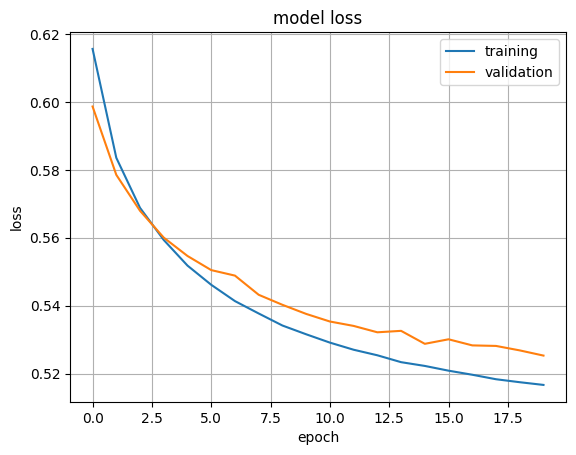

In [24]:
# Plotting training and validation losses
print(f"Final loss: {history.history['loss'][-1]}")
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'])
plt.grid()
plt.show()

In [25]:
# Predict the class labels of the test data
y_pred = model.predict(X_test)
for i in range(len(y_pred)):
  if y_pred[i] > 0.5:
     y_pred[i] = 1
  else:
     y_pred[i] = 0

# Display confusion matrix and classification report for the test data
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

469/469 [==============================] - 2s 4ms/step
Classification Report:
              precision    recall  f1-score   support

         0.0       0.73      0.70      0.72      6953
         1.0       0.75      0.78      0.76      8047

    accuracy                           0.74     15000
   macro avg       0.74      0.74      0.74     15000
weighted avg       0.74      0.74      0.74     15000

Confusion Matrix:
[[4882 2071]
 [1790 6257]]


In [26]:
# Model 2: neural networks with 1 hidden layer using RelU , without dropout and with epochs = 50

# Build the model
model = keras.Sequential([
    layers.Dense(300, activation = 'relu', input_shape = (28,)),
    layers.Dense(1, activation = 'sigmoid')
])

# Use early stopping as a regularization technique to avoid overfitting
es = EarlyStopping(monitor = 'val_accuracy', mode = 'max', verbose = 1, patience = 10)
mc = ModelCheckpoint('/content/gdrive/My Drive/best_model.h5', monitor = 'val_accuracy', mode = 'auto')

# Compile the model
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# Train the model on the training data
history = model.fit(X_train, y_train, epochs = 50, batch_size = 2048, verbose = 1, validation_data = (X_val, y_val), callbacks = [es,mc])

# Compute the training, validation, and testing accuracies of the classifier
loss_train, accuracy_train = model.evaluate(X_train, y_train, verbose=2)
loss_test, accuracy_test   = model.evaluate(X_test, y_test, verbose=2)
loss_val, accuracy_val     = model.evaluate(X_val, y_val, verbose=2)

print('Accuracy on train set:', accuracy_train)
print('Accuracy on test set:', accuracy_test)
print('Accuracy on validation set:', accuracy_val)

Epoch 1/50
279/279 [==============================] - 4s 13ms/step - loss: 0.6147 - accuracy: 0.6624 - val_loss: 0.5964 - val_accuracy: 0.6802
Epoch 2/50
279/279 [==============================] - 3s 10ms/step - loss: 0.5840 - accuracy: 0.6938 - val_loss: 0.5796 - val_accuracy: 0.6946
Epoch 3/50
279/279 [==============================] - 2s 8ms/step - loss: 0.5688 - accuracy: 0.7058 - val_loss: 0.5688 - val_accuracy: 0.7078
Epoch 4/50
279/279 [==============================] - 2s 8ms/step - loss: 0.5592 - accuracy: 0.7133 - val_loss: 0.5596 - val_accuracy: 0.7143
Epoch 5/50
279/279 [==============================] - 2s 8ms/step - loss: 0.5523 - accuracy: 0.7178 - val_loss: 0.5560 - val_accuracy: 0.7166
Epoch 6/50
279/279 [==============================] - 3s 10ms/step - loss: 0.5470 - accuracy: 0.7208 - val_loss: 0.5493 - val_accuracy: 0.7207
Epoch 7/50
279/279 [==============================] - 4s 13ms/step - loss: 0.5419 - accuracy: 0.7245 - val_loss: 0.5459 - val_accuracy: 0.7218
Ep

In [27]:
# Visualize our neural network model
from ann_visualizer.visualize import ann_viz
ann_viz(model, title = "Neural Network Model2", view = True, filename = "model2")

In [28]:
# Print the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 300)               8700      
                                                                 
 dense_5 (Dense)             (None, 1)                 301       
                                                                 
Total params: 9,001
Trainable params: 9,001
Non-trainable params: 0
_________________________________________________________________


Final loss: 0.5044113993644714


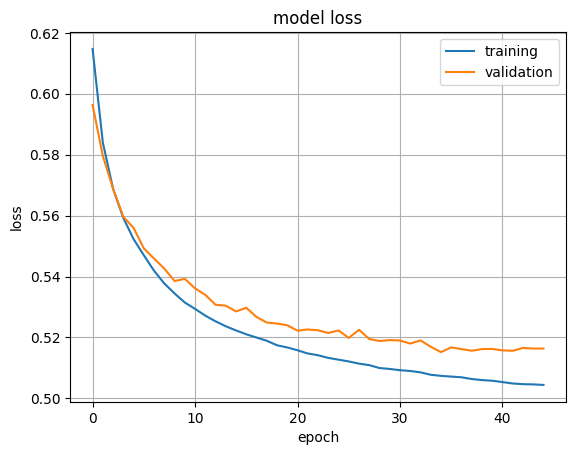

In [29]:
# Plotting training and validation losses
print(f"Final loss: {history.history['loss'][-1]}")
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'])
plt.grid()
plt.show()

In [30]:
# Predict the class labels of the test data
y_pred = model.predict(X_test)
for i in range(len(y_pred)):
  if y_pred[i] > 0.5:
     y_pred[i] = 1
  else:
     y_pred[i] = 0

# Display confusion matrix and classification report for the test data
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

469/469 [==============================] - 1s 1ms/step
Classification Report:
              precision    recall  f1-score   support

         0.0       0.72      0.72      0.72      6953
         1.0       0.76      0.76      0.76      8047

    accuracy                           0.74     15000
   macro avg       0.74      0.74      0.74     15000
weighted avg       0.74      0.74      0.74     15000

Confusion Matrix:
[[4990 1963]
 [1931 6116]]


In [31]:
# Model 3: neural networks with 1 hidden layer using TanH , without dropout and with epochs = 20

# Build the model
model = keras.Sequential([
    layers.Dense(300, activation = 'tanh', input_shape = (28,)),
    layers.Dense(1, activation = 'sigmoid')
])

# Use early stopping as a regularization technique to avoid overfitting
es = EarlyStopping(monitor = 'val_accuracy', mode = 'max', verbose = 1, patience = 10)
mc = ModelCheckpoint('/content/gdrive/My Drive/best_model.h5', monitor = 'val_accuracy', mode = 'auto')

# Compile the model
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# Train the model on the training data
history = model.fit(X_train, y_train, epochs = 20, batch_size = 2048, verbose = 1, validation_data = (X_val, y_val), callbacks = [es,mc])

# Compute the training, validation, and testing accuracies of the classifier
loss_train, accuracy_train = model.evaluate(X_train, y_train, verbose=2)
loss_test, accuracy_test   = model.evaluate(X_test, y_test, verbose=2)
loss_val, accuracy_val     = model.evaluate(X_val, y_val, verbose=2)

print('Accuracy on train set:', accuracy_train)
print('Accuracy on test set:', accuracy_test)
print('Accuracy on validation set:', accuracy_val)

Epoch 1/20
279/279 [==============================] - 4s 11ms/step - loss: 0.6377 - accuracy: 0.6367 - val_loss: 0.6337 - val_accuracy: 0.6471
Epoch 2/20
279/279 [==============================] - 4s 14ms/step - loss: 0.6250 - accuracy: 0.6548 - val_loss: 0.6215 - val_accuracy: 0.6589
Epoch 3/20
279/279 [==============================] - 2s 9ms/step - loss: 0.6093 - accuracy: 0.6701 - val_loss: 0.6050 - val_accuracy: 0.6715
Epoch 4/20
279/279 [==============================] - 2s 9ms/step - loss: 0.5944 - accuracy: 0.6833 - val_loss: 0.5913 - val_accuracy: 0.6879
Epoch 5/20
279/279 [==============================] - 2s 9ms/step - loss: 0.5817 - accuracy: 0.6941 - val_loss: 0.5822 - val_accuracy: 0.6938
Epoch 6/20
279/279 [==============================] - 2s 8ms/step - loss: 0.5706 - accuracy: 0.7028 - val_loss: 0.5700 - val_accuracy: 0.7041
Epoch 7/20
279/279 [==============================] - 3s 12ms/step - loss: 0.5614 - accuracy: 0.7098 - val_loss: 0.5640 - val_accuracy: 0.7069
Epo

In [32]:
# Visualize our neural network model
from ann_visualizer.visualize import ann_viz
ann_viz(model, title = "Neural Network Model3", view = True, filename = "model3")

In [33]:
# Print the model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 300)               8700      
                                                                 
 dense_7 (Dense)             (None, 1)                 301       
                                                                 
Total params: 9,001
Trainable params: 9,001
Non-trainable params: 0
_________________________________________________________________


Final loss: 0.5250945091247559


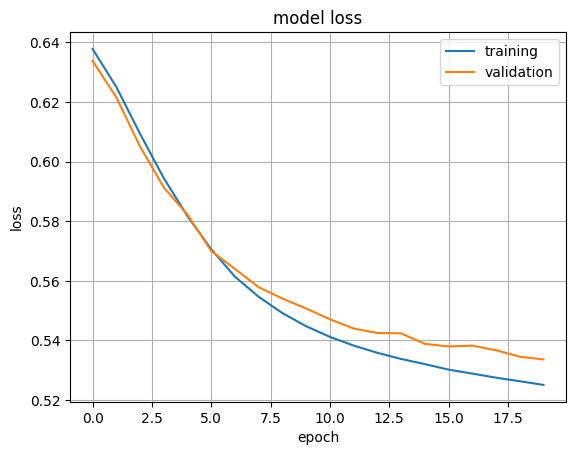

In [34]:
# Plotting training and validation losses
print(f"Final loss: {history.history['loss'][-1]}")
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'])
plt.grid()
plt.show()

In [35]:
# Predict the class labels of the test data
y_pred = model.predict(X_test)
for i in range(len(y_pred)):
  if y_pred[i] > 0.5:
     y_pred[i] = 1
  else:
     y_pred[i] = 0

# Display confusion matrix and classification report for the test data
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

469/469 [==============================] - 1s 1ms/step
Classification Report:
              precision    recall  f1-score   support

         0.0       0.71      0.71      0.71      6953
         1.0       0.75      0.75      0.75      8047

    accuracy                           0.73     15000
   macro avg       0.73      0.73      0.73     15000
weighted avg       0.73      0.73      0.73     15000

Confusion Matrix:
[[4945 2008]
 [1993 6054]]


In [36]:
# Model 4: neural networks with 1 hidden layer using TanH , without dropout and with epochs = 50

# Build the model
model = keras.Sequential([
    layers.Dense(300, activation = 'tanh', input_shape = (28,)),
    layers.Dense(1, activation = 'sigmoid')
])

# Use early stopping as a regularization technique to avoid overfitting
es = EarlyStopping(monitor = 'val_accuracy', mode = 'max', verbose = 1, patience = 10)
mc = ModelCheckpoint('/content/gdrive/My Drive/best_model.h5', monitor = 'val_accuracy', mode = 'auto')

# Compile the model
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# Train the model on the training data
history = model.fit(X_train, y_train, epochs = 50, batch_size = 2048, verbose = 1, validation_data = (X_val, y_val), callbacks = [es,mc])

# Compute the training, validation, and testing accuracies of the classifier
loss_train, accuracy_train = model.evaluate(X_train, y_train, verbose=2)
loss_test, accuracy_test   = model.evaluate(X_test, y_test, verbose=2)
loss_val, accuracy_val     = model.evaluate(X_val, y_val, verbose=2)

print('Accuracy on train set:', accuracy_train)
print('Accuracy on test set:', accuracy_test)
print('Accuracy on validation set:', accuracy_val)

Epoch 1/50
279/279 [==============================] - 4s 10ms/step - loss: 0.6377 - accuracy: 0.6372 - val_loss: 0.6334 - val_accuracy: 0.6462
Epoch 2/50
279/279 [==============================] - 4s 13ms/step - loss: 0.6250 - accuracy: 0.6553 - val_loss: 0.6213 - val_accuracy: 0.6596
Epoch 3/50
279/279 [==============================] - 3s 10ms/step - loss: 0.6116 - accuracy: 0.6684 - val_loss: 0.6072 - val_accuracy: 0.6732
Epoch 4/50
279/279 [==============================] - 2s 9ms/step - loss: 0.5980 - accuracy: 0.6804 - val_loss: 0.5952 - val_accuracy: 0.6835
Epoch 5/50
279/279 [==============================] - 2s 9ms/step - loss: 0.5849 - accuracy: 0.6921 - val_loss: 0.5828 - val_accuracy: 0.6952
Epoch 6/50
279/279 [==============================] - 2s 9ms/step - loss: 0.5731 - accuracy: 0.7018 - val_loss: 0.5712 - val_accuracy: 0.7017
Epoch 7/50
279/279 [==============================] - 3s 12ms/step - loss: 0.5636 - accuracy: 0.7085 - val_loss: 0.5634 - val_accuracy: 0.7099
Ep

In [37]:
# Visualize our neural network model
from ann_visualizer.visualize import ann_viz
ann_viz(model, title = "Neural Network Model4", view = True, filename = "model4")

In [38]:
# Print the model summary
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 300)               8700      
                                                                 
 dense_9 (Dense)             (None, 1)                 301       
                                                                 
Total params: 9,001
Trainable params: 9,001
Non-trainable params: 0
_________________________________________________________________


Final loss: 0.5056148171424866


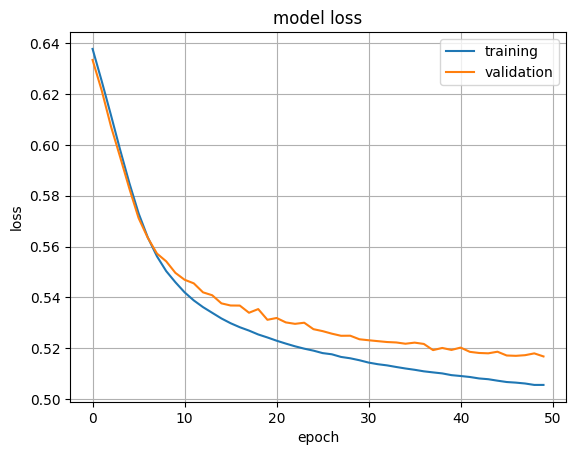

In [39]:
# Plotting training and validation losses
print(f"Final loss: {history.history['loss'][-1]}")
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'])
plt.grid()
plt.show()

In [40]:
# Predict the class labels of the test data
y_pred = model.predict(X_test)
for i in range(len(y_pred)):
  if y_pred[i] > 0.5:
     y_pred[i] = 1
  else:
     y_pred[i] = 0

# Display confusion matrix and classification report for the test data
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

469/469 [==============================] - 1s 1ms/step
Classification Report:
              precision    recall  f1-score   support

         0.0       0.72      0.72      0.72      6953
         1.0       0.76      0.76      0.76      8047

    accuracy                           0.74     15000
   macro avg       0.74      0.74      0.74     15000
weighted avg       0.74      0.74      0.74     15000

Confusion Matrix:
[[4988 1965]
 [1903 6144]]
